# 생물정보학 및 실습 1 - Term Project용 Mission 3 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2024년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


# 프로그램 설치
**첫 실습 시간에 데이터 복사를 마쳤으면 여기부터 시작합니다.**

데이터 준비가 끝났으면, 이제 이번 시간 실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [1]:
!mamba install -y bedtools bioawk samtools


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bedtools', 'bioawk', 'samtools']

warning  libmamba Cache file "/rna/myk/conda/pkgs/cache/497deca9

## Mission 3

이번 미션에서는 Figure S2A 아랫쪽에 표시되는 clustered error 분석 (CIMS; Crosslinking-induced mutation sites)을 합니다. 자외선에 의해서 단백질이 붙어있다가 단백질 분해효소로 단백질을 뜯어내고 남은 자리에서는 reverse-transcriptase가 오류를 자주 냅니다. 오류율을 분석해서 단백질이 앉아 있었던 자리를 분석해 봅시다.

데이터는 지난 번과 동일하기 때문에 이미 다운로드 받으셨다면 다시 다운로드 받을 필요는 없습니다.

Genome 전체로 계산하는 방법은 자원도 꽤 쓰고 시간이 걸리기 때문에 여기서는 유전자 단위로 간략하게 하도록 합시다. 예시로 Mirlet7g를 해 보고, 추가로 Mirlet7f-1과 Mirlet7d도 봐서 비교해 봅시다.

논문은 예전 레퍼런스 유전체인 mm9을 쓰고 있기 때문에, 현재 사용되는 레퍼런스 mm39와는 좌표계에 차이가 있습니다. 새로 annotation에서 위치를 찾습니다.

In [2]:
!grep -i mirlet7d /rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


위 결과에서 gtf 파일이 없다고 나오면 압축이 풀리지 않은 상태일 수 있으니, 미리 풀어서 작업해보세요.

Splicing 되지 않는 transcript이기 때문에 결과가 단조롭습니다. 해당 좌표 범위로 bam을 솎아냅니다.

In [3]:
!samtools view -b -o CLIP-let7d.bam /rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/CLIP-35L33G.bam chr13:48689488-48689590
!samtools view CLIP-let7d.bam

SRR458758.2334592	16	chr13	48689488	38	40M1D23M	*	0	0	AATAAGGCCCTAAGAAAGGCAGCAGGTCGTATAGTTAACTCTTGTGGGCAAAATCTCTGCCCT	BGGEGBFGFDD6GGGGGFGDG8BGGGGGGG>GGAECECD<GGGGGDGGDDGDEBE8EDE,D<E	MD:Z:40^C23	NH:i:1	HI:i:1	NM:i:1	SM:i:38	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-	XY:Z:+ENSMUST00000181490.4:2428..2491,+ENSMUST00000083519.3:40..103
SRR458758.3105634	16	chr13	48689488	40	64M	*	0	0	AATAAGGCCCTAAGAAAGGCAGCAGGTCGTATAGTTAACTCCTTGTGGGCAAAATCTCTGCCCT	IIIIIIIIIIIIIIIIIIIIIIIGIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	MD:Z:64	NH:i:1	HI:i:1	NM:i:0	SM:i:40	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-	XY:Z:+ENSMUST00000181490.4:2428..2491,+ENSMUST00000083519.3:40..103
SRR458758.3885278	16	chr13	48689488	39	40M1D23M	*	0	0	AATAAGGCCCTAAGAAAGGCAGCAGGTCGTATAGTTAACTCTTGTGGGCAAAATCTCTGCCCT	HHHGGEFD8HHAGHGHHEHHHHGHHHEGHHHHHGGGGGEGBHHHHHHHHHHHHHHHHHHHHHH	MD:Z:40^C23	NH:i:1	HI:i:1	NM:i:1	SM:i:39	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-	XY:Z:+ENSMUST00000181490.4:2428..2491,+ENSMUST00000083519.3:40..103
SRR458758.4069060	16	chr13	48689488	40	64M	*

각 자리에 mapping된 read들의 분포를 요약하기 위해 samtools mpileup을 이용합니다. Shannon entropy를 구할 때는 reference를 따로 줄 필요는 없습니다. samtools를 쓰지 않고 직접 read를 분석하면 더욱 더 재미있습니다.

In [4]:
!samtools mpileup CLIP-let7d.bam > CLIP-let7d.pileup
!wc -l CLIP-let7d.pileup

[mpileup] 1 samples in 1 input files
87 CLIP-let7d.pileup


Mirlet7g는 100bp도 안 되는 짧은 gene인데 `mpileup` 결과는 엄청 길게 나옵니다. 왜 그럴까요? (잘 한 번 생각해 봅시다)

이제 Mirlet7g의 핵심부분을 살펴봐서 어떻게 하면 좋을지 견적을 내 봅니다.

In [5]:
!head CLIP-let7d.pileup

chr13	48689488	N	24	^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^Ia^Ga^Ga^Ga^Ia^Ea^Da^Ha^Ga	BIHGGIHIEIIIGIHIGEGH5BDD
chr13	48689489	N	53	aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia^Ga^Ga^Ia^Ia^Ha^Ia^Ia^Ha^Ha^Da^Ia^Ha^Ia^Ia^Ia^Ia^Ia^Ha^Ga^Ga	GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGHIIIGHDC
chr13	48689490	N	69	ttttttttttttttttttttttttttttttttttttttttttttttttttttt^Gt^Gt^Ht^Gt^It^It^Ht^It^Gt^Gt^Ht^It^It^It^Ht^It	GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBGIIIGHBG=BG=IIGIDGHFIIHI
chr13	48689491	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Ha^Ga^Ia^Ga^Ia^Ga^Ha^Ha^Ha^Ga^Ia^Ha^Ha^Ia^@a^Ia^Ia^Ia^Ga^Ha^Ha^Ga^Ha^Ga^Ia^Ha^Ga^Ia^Ga^Ha^Ga^Ia^Ia^Ga	EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHIIIIGHDC3=G:IGGIDEHIFIGHII=GIDHEGHHEIGGI7III9=HGBAIGBIGFG>I2
chr13	48689492	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHIIIIDDGC1<GCIIHIGCHIIIEIIIGCI

In [6]:
!awk '$2 >= 48689488 && $2 <= 48689590 { print $0; }' CLIP-let7d.pileup > CLIP-let7d-gene.pileup
!tail CLIP-let7d-gene.pileup

chr13	48689565	N	6	cccccc	>IGIIH
chr13	48689566	N	6	tttttt	:IGFIH
chr13	48689567	N	6	aaaaaa	8IFIFI
chr13	48689568	N	6	cccccc	?IGIII
chr13	48689569	N	6	tttttt	;IGIII
chr13	48689570	N	5	aaaaa	EDECD
chr13	48689571	N	6	cccccc	:GGIGG
chr13	48689572	N	6	cccccc	:GGIGG
chr13	48689573	N	6	tttttt	5GGIGG
chr13	48689574	N	6	c$c$c$c$c$c$	;GGIGG


이제 pandas에 불러와서 분석해 봅니다. R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [7]:
import pandas as pd

pileup = pd.read_csv('CLIP-let7d-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup

,chrom,pos,_ref,count,basereads,quals
0,chr13,48689488,N,24,^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^...,BIHGGIHIEIIIGIHIGEGH5BDD
1,chr13,48689489,N,53,aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia...,GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGH...
2,chr13,48689490,N,69,tttttttttttttttttttttttttttttttttttttttttttttt...,GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBG...
3,chr13,48689491,N,105,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHI...
4,chr13,48689492,N,105,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHI...
...,...,...,...,...,...,...
82,chr13,48689570,N,5,aaaaa,EDECD
83,chr13,48689571,N,6,cccccc,:GGIGG
84,chr13,48689572,N,6,cccccc,:GGIGG
85,chr13,48689573,N,6,tttttt,5GGIGG


여기서 pileup에서 계산에 사용할 것은 match와 substitution만입니다. 나머지에 해당하는 tag들은 제거합니다.

R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [8]:
import re
toremove = re.compile('[<>$*#^HDIQNM]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [9]:
pileup_new = pileup[['chrom', 'pos', 'matches']]
pileup_new

,chrom,pos,matches
0,chr13,48689488,GaaaaaaaaGaaaaaaaaGaGaGaaEaaaGa
1,chr13,48689489,aaaaaaaaaaaaaaaaaaaaaaaaaaaaGaGaaaaGaGaaaaaaaa...
2,chr13,48689490,tttttttttttttttttttttttttttttttttttttttttttttt...
3,chr13,48689491,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
4,chr13,48689492,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
...,...,...,...
82,chr13,48689570,aaaaa
83,chr13,48689571,cccccc
84,chr13,48689572,cccccc
85,chr13,48689573,tttttt


In [11]:
pileup_new[pileup_new['pos'] == 48689522].iloc[0]['matches']

'tttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt'

처리하는 도중에 matches에서 뜻밖의 예외상황이 있을 수 있습니다.
예외상황 중 결과에 영향을 미치지 않는 패턴은 미리 제거하고 처리하면 편리합니다.

자 이제 데이터 준비가 대충 끝났습니다. 다음 순서로 진행해 보세요. (1-4번 단계는 R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.)

1. 각 position별로 base수를 셉니다.
1. 각 position별로 Shannon entropy를 계산합니다.
1. 계산한 Shannon entropy를 [bedgraph format](https://genome.ucsc.edu/goldenPath/help/bedgraph.html)으로 출력합니다. 말은 복잡해도 실제로는 간단합니다. 4칸짜리를 만드시면 됩니다.
1. 결과 파일을 본인의 Google Drive에서 가져옵니다.
1. [UCSC Genome Browser](http://genome.ucsc.edu/cgi-bin/hgTracks?db=mm39&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr9%3A106056039-106056126)에 접속해서 Genome은 mm39로 선택합니다.
1. 그래프 아랫쪽의 add custom tracks 버튼을 누릅니다.
1. Paste URLs or data 옆의 Choose File 버튼을 누르고 우리가 만든 bedgraph 파일을 업로드 합니다.
1. 그리고 이리 저리 감상해 보다가 View 메뉴의 PDF/PS 를 눌러서 인증샷을 한 번 찍습니다.
1. Mirlet7d와 Mirlet7f-1도 한 번 해 봅니다.

In [12]:
pileup_new['base'] = pileup_new['matches'].str.len()
pileup_new

/tmp/ipykernel_1860718/737474777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new['base'] = pileup_new['matches'].str.len()


,chrom,pos,matches,base
0,chr13,48689488,GaaaaaaaaGaaaaaaaaGaGaGaaEaaaGa,31
1,chr13,48689489,aaaaaaaaaaaaaaaaaaaaaaaaaaaaGaGaaaaGaGaaaaaaaa...,59
2,chr13,48689490,tttttttttttttttttttttttttttttttttttttttttttttt...,74
3,chr13,48689491,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,117
4,chr13,48689492,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,105
...,...,...,...,...
82,chr13,48689570,aaaaa,5
83,chr13,48689571,cccccc,6
84,chr13,48689572,cccccc,6
85,chr13,48689573,tttttt,6


In [13]:
import numpy as np
from collections import Counter

def calculate_shannon_entropy(base_counts):
    total = sum(base_counts.values())
    entropy = 0
    for count in base_counts.values():
        if count > 0:
            p = count / total
            entropy -= p * np.log2(p)
    return entropy

entropies = []

for index, row in pileup_new.iterrows():
    base_counts = Counter(row['matches'])
    entropy = calculate_shannon_entropy(base_counts)
    entropies.append(entropy)

# Add the entropy values to the DataFrame
pileup_new['shannon_entropy'] = entropies

pileup_new

/tmp/ipykernel_1860718/63681168.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new['shannon_entropy'] = entropies


,chrom,pos,matches,base,shannon_entropy
0,chr13,48689488,GaaaaaaaaGaaaaaaaaGaGaGaaEaaaGa,31,0.904233
1,chr13,48689489,aaaaaaaaaaaaaaaaaaaaaaaaaaaaGaGaaaaGaGaaaaaaaa...,59,0.474345
2,chr13,48689490,tttttttttttttttttttttttttttttttttttttttttttttt...,74,0.356780
3,chr13,48689491,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,117,0.519514
4,chr13,48689492,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,105,0.000000
...,...,...,...,...,...
82,chr13,48689570,aaaaa,5,0.000000
83,chr13,48689571,cccccc,6,0.000000
84,chr13,48689572,cccccc,6,0.000000
85,chr13,48689573,tttttt,6,0.000000


In [15]:
pileup_new['pos_end'] = pileup_new['pos'] + 1
bedform = pileup_new[['chrom', 'pos', 'pos_end', 'shannon_entropy']]
bedform.to_csv('let7d-entropy.bed', sep='\t', index=False, header=False)
bedform

/tmp/ipykernel_1860718/3859498853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new['pos_end'] = pileup_new['pos'] + 1


,chrom,pos,pos_end,shannon_entropy
0,chr13,48689488,48689489,0.904233
1,chr13,48689489,48689490,0.474345
2,chr13,48689490,48689491,0.356780
3,chr13,48689491,48689492,0.519514
4,chr13,48689492,48689493,0.000000
...,...,...,...,...
82,chr13,48689570,48689571,0.000000
83,chr13,48689571,48689572,0.000000
84,chr13,48689572,48689573,0.000000
85,chr13,48689573,48689574,0.000000


In [101]:
pileup_new[pileup_new['pos'] == 106056045]

,chrom,pos,matches,base,shannon_entropy,pos_end
6,chr9,106056045,TTTGTTTTGTTTTTTTTGTTGTTTTTGT,28,0.676942,106056046


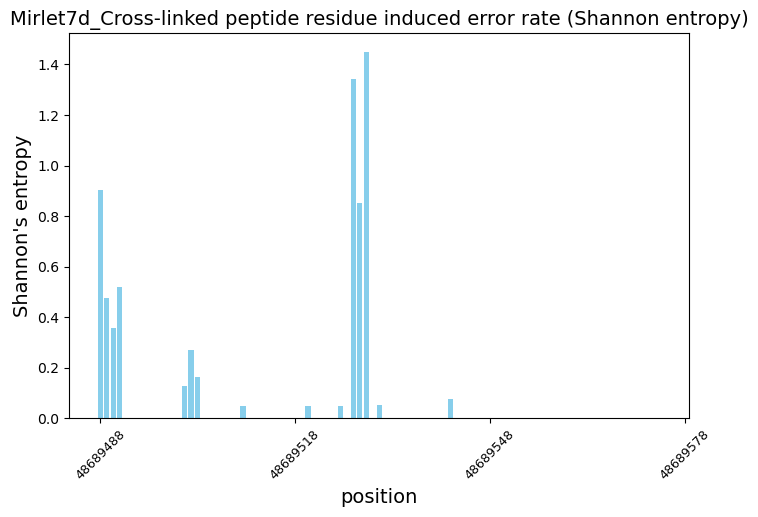

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(bedform['pos'], bedform['shannon_entropy'], color='skyblue')
plt.xlabel('position', fontsize=14)
plt.ylabel("Shannon's entropy", fontsize=14)
plt.title('Mirlet7d_Cross-linked peptide residue induced error rate (Shannon entropy)', fontsize=14)

xtick = [48689488, 48689518, 48689548, 48689578]
plt.xticks(xtick, xtick, fontsize=9, rotation=45)
plt.show()